<a href="https://colab.research.google.com/github/Viliuskerutis/AML/blob/main/AML_MP1_Kerutis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MP1 - Viral Data Analysis
Date: 2020.10.11

Author: © 2020 Vilius Kerutis

This notebook is part of an individual project for [KTU IF](https://fi.ktu.edu/) [P176M010 Advanced Machine Learning](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [M. Lukoševičius](http://mantas.info/).

Here I analyze open COVID-19 data from https://ourworldindata.org/ to answer the following questions:

1. [Which country has the most deaths per million people in June?](#Q1)
1. [What is the correlation between human development and total deaths among countries?](#Q2)
1. [What is the future prognosis of total deaths per million people, taking a history of total cases as input in Haiti?](#Q3)

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>. <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons licencija" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a>

## Load the data

In [212]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
import numpy.ma as ma
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pd.options.mode.chained_assignment = None
import requests

In [215]:
#df = pd.read_csv('https://raw.githubusercontent.com/Viliuskerutis/AML/main/owid-covid-data.csv', low_memory=False)
fname = 'owid-covid-data.csv'
url = 'https://covid.ourworldindata.org/data/' + fname
r = requests.get(url)
open(fname, 'wb').write(r.content)
df = pd.read_csv(url, parse_dates=[3])
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

Check the "freshness" of the data.

In [216]:
df.date.max()

Timestamp('2020-10-24 00:00:00')

All the different country codes:

In [217]:
df.iso_code.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM',
       'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MKD',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX',
       'MDA', '

Column info.

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52222 entries, 0 to 52221
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         51923 non-null  object        
 1   continent                        51624 non-null  object        
 2   location                         52222 non-null  object        
 3   date                             52222 non-null  datetime64[ns]
 4   total_cases                      48615 non-null  float64       
 5   new_cases                        51338 non-null  float64       
 6   new_cases_smoothed               50550 non-null  float64       
 7   total_deaths                     39750 non-null  float64       
 8   new_deaths                       51338 non-null  float64       
 9   new_deaths_smoothed              50550 non-null  float64       
 10  total_cases_per_million          48352 non-null  float64  

In [219]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.861500e+04,51338.000000,50550.000000,3.975000e+04,51338.000000,50550.000000,48352.000000,51274.000000,50485.000000,39502.000000,51274.000000,50485.000000,1.974700e+04,1.940500e+04,19747.000000,19405.000000,2.179200e+04,21792.000000,20099.000000,20443.000000,43476.000000,5.192300e+04,49519.000000,46514.000000,45817.000000,46272.000000,45899.000000,30609.000000,46494.000000,48173.000000,36274.000000,35809.000000,21919.000000,41928.000000,51260.000000,44875.000000
mean,1.374720e+05,1647.029160,1620.609168,6.166195e+03,44.617398,44.582023,2530.651196,30.502269,29.467562,85.732276,0.594579,0.589742,1.905907e+06,2.581705e+04,66.336827,0.826141,2.488937e+04,0.805787,192.383357,0.064548,56.915738,8.689905e+07,361.164024,31.249086,9.213762,5.824350,20753.505689,12.293322,252.028997,8.055457,10.771577,32.639162,52.264742,3.097904,73.975616,0.723403
std,1.377259e+06,14887.148134,14515.855655,4.993555e+04,372.060319,361.132657,5000.689880,108.566336,73.862492,170.013082,2.953105,1.865523,8.657876e+06,1.051654e+05,132.322326,1.534724,9.695588e+04,1.387750,915.093742,0.087988,26.666508,6.068755e+08,1648.021201,9.036971,6.306955,4.304128,20369.724988,19.337209,117.417401,4.156446,10.475674,13.440685,31.626630,2.519943,7.388114,0.153083
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,-67.901000,-9.678000,1.000000e+00,-3.743000e+03,0.000000,-0.398000,0.000000e+00,0.000000,1.535000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.450000e+02,0.000000,0.714000,1.100000e+01,0.000000,0.000000,73.557000,0.000000,0.205000,3.384250,0.000000,0.000000,5.366700e+04,1.008000e+03,3.338000,0.068000,1.091000e+03,0.069000,11.479500,0.009000,38.890000,1.399491e+06,37.728000,23.200000,3.552000,2.085000,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,1.745000e+03,12.000000,17.429000,7.200000e+01,0.000000,0.286000,486.958000,1.880000,3.454000,17.733000,0.000000,0.025000,2.299580e+05,3.486000e+03,17.078000,0.311000,3.874500e+03,0.325000,32.519000,0.030000,61.110000,8.278737e+06,88.125000,31.100000,6.981000,4.393000,14048.881000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.400000,0.754000
75%,1.724800e+04,195.750000,204.857000,6.160000e+02,3.000000,3.571000,2823.746250,21.867750,24.559000,72.256750,0.244000,0.347000,9.141365e+05,1.281300e+04,72.630000,0.970000,1.371450e+04,0.975000,105.000000,0.086000,78.700000,2.982597e+07,214.243000,39.700000,14.762000,9.395000,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,4.227908e+07,468117.000000,405812.857000,1.145314e+06,10491.000000,7456.857000,52261.697000,8652.658000,2472.188000,1237.551000,215.382000,63.140000,1.600000e+08,1.492409e+06,1553.505000,25.971000,1.169107e+06,19.098000,45864.000000,0.651000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


<a id='Q1'></a>
# 1. Which country has the most deaths per million people in June?

Find a country with the most total deaths per million people in June.

In [220]:
date_from = pd.Timestamp(date(2020,6,1))
date_to = pd.Timestamp(date(2020,7,1))
df['date'] =  pd.to_datetime(df['date'])
dff = df[(df['date'] > date_from ) & (df['date'] < date_to)]
dff = dff.loc[dff['total_deaths_per_million'].idxmax()]

pd.DataFrame(dff[['iso_code', 'continent', 'location','total_cases','total_deaths','total_cases_per_million','total_deaths_per_million','population']])

,40144
iso_code,SMR
continent,Europe
location,San Marino
total_cases,687
total_deaths,42
total_cases_per_million,20242.8
total_deaths_per_million,1237.55
population,33938


<a id='Q2'></a>
# 2. What is the correlation between human development and total deaths among countries?

In [221]:
yesterday = date.today() - timedelta(2)
dfff = df[(df['date'] == date.strftime(yesterday, '%Y-%m-%d 00:00:00'))]

Text(0.5, 1.0, 'Correlation HDI and Total deaths')

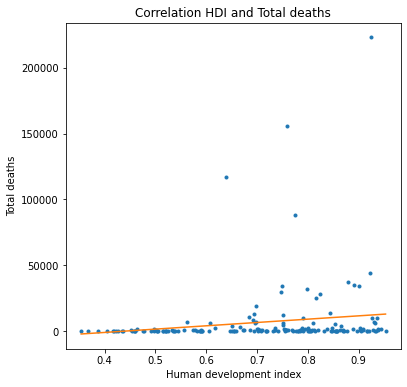

In [222]:
plt.figure(figsize=(6,6))
x = dfff.human_development_index
y = dfff.total_deaths
plt.plot(x, y, '.')
plt.xlabel('Human development index')
plt.ylabel('Total deaths')

w1, w0 = ma.polyfit(ma.masked_invalid(x), ma.masked_invalid(y), 1)
x_all = np.linspace(x.min(), x.max(), 100)
plt.plot(x_all, w0 + w1 * x_all, '-')

plt.title('Correlation HDI and Total deaths')

In [223]:
ma.corrcoef(ma.masked_invalid(x), ma.masked_invalid(y))[0,1]

0.16157722591252394

Text(0.5, 1.0, 'Correlation HDI and Total deaths per million people')

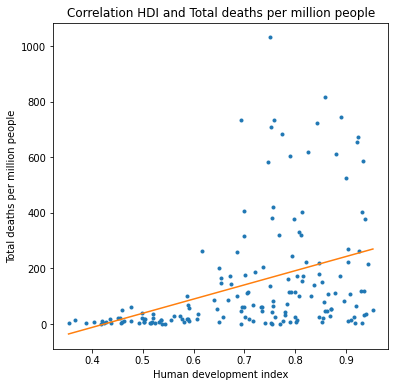

In [224]:
plt.figure(figsize=(6,6))
x = dfff.human_development_index
y = dfff.total_deaths_per_million
plt.plot(x, y, '.')
plt.xlabel('Human development index')
plt.ylabel('Total deaths per million people')

w1, w0 = ma.polyfit(ma.masked_invalid(x), ma.masked_invalid(y), 1)
x_all = np.linspace(x.min(), x.max(), 100)
plt.plot(x_all, w0 + w1 * x_all, '-')

plt.title('Correlation HDI and Total deaths per million people')

In [225]:
ma.corrcoef(ma.masked_invalid(x), ma.masked_invalid(y))[0,1]

0.3881924480921162

Correlation:

In [226]:
result1 = dfff['total_deaths'].corr(dfff['human_development_index'])
result2 = dfff['total_deaths_per_million'].corr(dfff['human_development_index'])
pd.DataFrame({"Correlation using:": ["Total deaths only:", "Total deaths per million people:"], "Result": [result1, result2]})

,Correlation using:,Result
0,Total deaths only:,0.161577
1,Total deaths per million people:,0.388192


There is a promiment correlation (coef. 0.16) between the HDI per capita and the total number of deaths per capita among countries.
There is a promiment correlation (coef. 0.37) between the HDI per capita and the total number of deaths per million people per capita among countries.

The same in loglog space:

Text(0.5, 1.0, 'Correlation HDI and Total deaths')

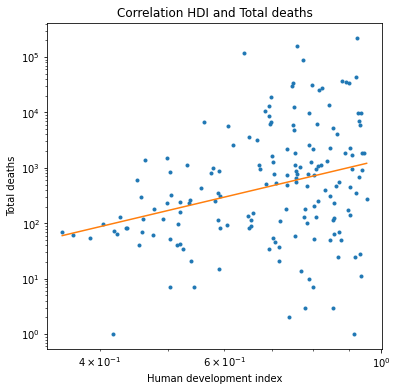

In [227]:
plt.figure(figsize=(6,6))
x = dfff.human_development_index
y = dfff.total_deaths
plt.loglog(x, y, '.')
plt.xlabel('Human development index')
plt.ylabel('Total deaths')


w1, w0 = ma.polyfit(ma.log(ma.masked_invalid(x)), ma.log(ma.masked_invalid(y)), 1)
x_all = np.linspace(np.log(x.min()), np.log(x.max()), 100)
plt.plot(np.exp(x_all), np.exp(w0 + w1 * x_all), '-')
plt.title('Correlation HDI and Total deaths')

In [228]:
ma.corrcoef(ma.log(ma.masked_invalid(x)), ma.log(ma.masked_invalid(y)))[0,1]

0.3028703245835867

Text(0.5, 1.0, 'Correlation HDI and Total deaths per million people')

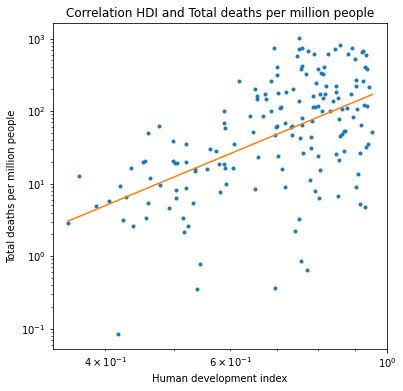

In [229]:
plt.figure(figsize=(6,6))
x = dfff.human_development_index
y = dfff.total_deaths_per_million
plt.loglog(x, y, '.')
plt.xlabel('Human development index')
plt.ylabel('Total deaths per million people')


w1, w0 = ma.polyfit(ma.log(ma.masked_invalid(x)), ma.log(ma.masked_invalid(y)), 1)
x_all = np.linspace(np.log(x.min()), np.log(x.max()), 100)
plt.plot(np.exp(x_all), np.exp(w0 + w1 * x_all), '-')
plt.title('Correlation HDI and Total deaths per million people')

In [230]:
ma.corrcoef(ma.log(ma.masked_invalid(x)), ma.log(ma.masked_invalid(y)))[0,1]

0.5443423680674455

On logarithmic scales the correlation is even more evident:

Correlation between HDI and Total deaths: coef. 0.29

Correlation between HDI and Total deaths per million people: coef. 0.54

A possible explanation could be that even though the countries with higher HDI per capita tend to have a better quality of life, higher literacy rate, and lifetime, their residents also have a more active social life (traveling, physical communication, being in a public most of the time).

<a id='Q3'></a>
# 3. What is the future prognosis of total deaths per million people, taking a history of total cases as input in Haiti?

Prepare datasets for future prognosis.

In [232]:
dfff = df[(df['location'] == 'Haiti' )]
dfff = dfff[dfff.total_deaths_per_million > 0]
dfff = dfff[dfff.total_cases > 0]
dfff = dfff.dropna(axis=1, how='all')
dfff.drop('iso_code', axis='columns', inplace=True)
dfff.drop('continent', axis='columns', inplace=True)
dfff.drop('location', axis='columns', inplace=True)
dfr = dfff[['total_deaths_per_million']] 

pd.DataFrame(dfff)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
20839,2020-04-07,24.0,3.0,1.286,1.0,1.0,0.143,2.105,0.263,0.113,0.088,0.088,0.013,90.74,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
20840,2020-04-08,25.0,1.0,1.429,1.0,0.0,0.143,2.192,0.088,0.125,0.088,0.000,0.013,90.74,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
20841,2020-04-09,27.0,2.0,1.571,1.0,0.0,0.143,2.368,0.175,0.138,0.088,0.000,0.013,90.74,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
20842,2020-04-10,30.0,3.0,1.714,2.0,1.0,0.286,2.631,0.263,0.150,0.175,0.088,0.025,90.74,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
20843,2020-04-11,31.0,1.0,1.857,2.0,0.0,0.286,2.719,0.088,0.163,0.175,0.000,0.025,90.74,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21035,2020-10-20,8976.0,51.0,13.429,231.0,0.0,0.143,787.194,4.473,1.178,20.259,0.000,0.013,43.52,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
21036,2020-10-21,8976.0,0.0,12.714,231.0,0.0,0.143,787.194,0.000,1.115,20.259,0.000,0.013,43.52,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
21037,2020-10-22,8979.0,3.0,10.143,231.0,0.0,0.000,787.457,0.263,0.890,20.259,0.000,0.000,NaN,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
21038,2020-10-23,8979.0,0.0,7.714,231.0,0.0,0.000,787.457,0.000,0.677,20.259,0.000,0.000,NaN,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498


In [233]:
pd.DataFrame(dfr)

,total_deaths_per_million
20839,0.088
20840,0.088
20841,0.088
20842,0.175
20843,0.175
...,...
21035,20.259
21036,20.259
21037,20.259
21038,20.259


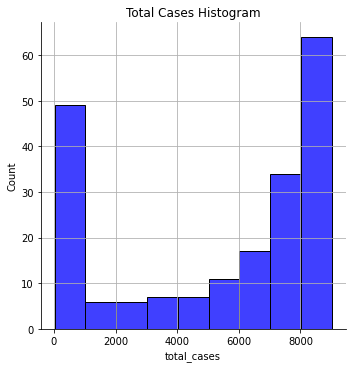

In [234]:
sns.displot(dfff['total_cases'], color="blue")
plt.title('Total Cases Histogram')
plt.grid(True)
plt.show()

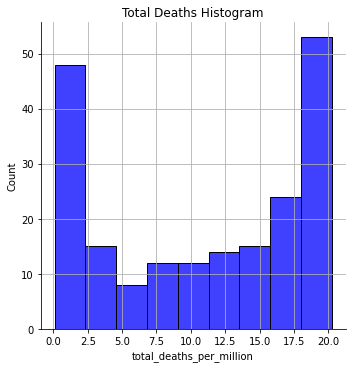

In [235]:
sns.displot(dfff['total_deaths_per_million'], color="blue")
plt.title('Total Deaths Histogram')
plt.grid(True)
plt.show()

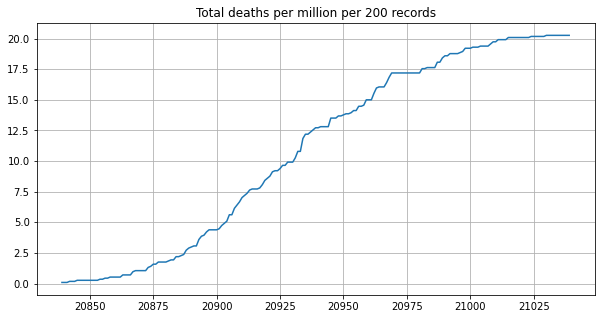

In [236]:
dfff['total_deaths_per_million'].plot(figsize = (10,5), grid = True)
plt.title('Total deaths per million per 200 records')
plt.show()

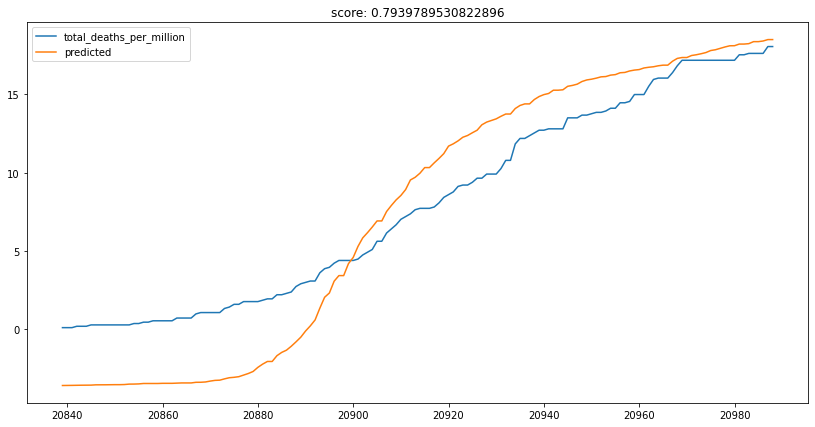

In [237]:
def experiment(X_train_, y_train_, X_test_, y_test_):
    pipe0 = Pipeline([('scaler', StandardScaler()), ('svc', LinearRegression())])
    pipe0 = pipe0.fit(X_train_, y_train_)
    score = pipe0.score(X_test_, y_test_)
    y_test_['predicted'] = pipe0.predict(X_test_.values)
    y_test_.plot(figsize=(14,7), title=f"score: {score}")
    pd.DataFrame(y_test_)
    return pipe0

x_train = dfff.iloc[150:, [1]]
y_train = dfr.iloc[150:]
x_test = dfff.iloc[:150, [1]]
y_test = dfr.iloc[:150]

pipe = experiment(x_train, y_train, x_test, y_test)

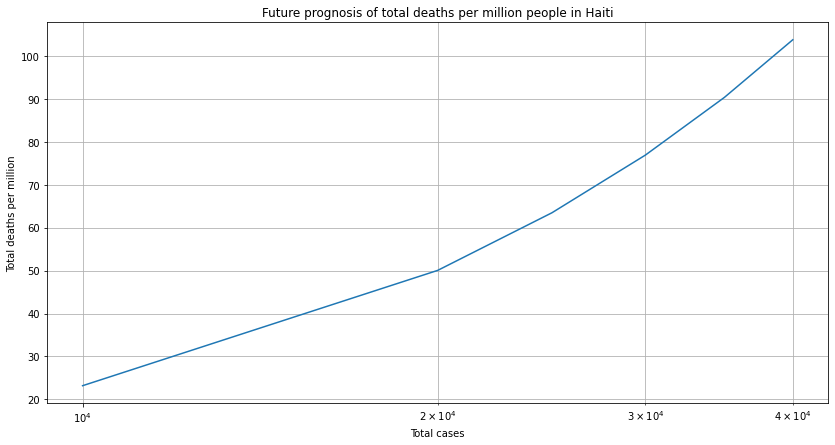

In [238]:
data = np.array([[10000],[20000],[25000],[30000],[35000],[40000]])
future_prognosis = pipe.predict(data)
future_prognosis
plt.figure(figsize=(14,7))
plt.grid(which='both')
plt.plot(data,future_prognosis)
plt.title('Future prognosis of total deaths per million people in Haiti')
plt.xlabel('Total cases')
plt.xscale('log')
plt.ylabel('Total deaths per million')
plt.show()